In [36]:
#Импортируем данные
import pandas as pd
import numpy as np
df = pd.read_csv('dataset_kidney_disease.csv')
print("Исходное количество строк:", len(df))
df.head(5)

Исходное количество строк: 400


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [2]:
#Заменяем строки на числа
df.replace('?', pd.NA, inplace=True)
for i in ['bp','bgr','sod','pot','wbcc','rbcc','hemo','pcv']:
    df[i] = pd.to_numeric(df[i], errors='coerce')
#Заменяем текст на числовые значения 
rbc_mapping = {'normal': 1, 'abnormal': 0}
pcc_mapping = {'present': 1, 'notpresent': 0}
htn_mapping = {'yes': 1, 'no': 0}
appet_mapping = {'good': 1, 'poor': 0}
class_mapping = {'ckd': 1, 'notckd':0}
df['rbc'] = df['rbc'].map(rbc_mapping)
df['pc'] = df['pc'].map(rbc_mapping)
df['pcc'] = df['pcc'].map(pcc_mapping)
df['ba'] = df['ba'].map(pcc_mapping)
df['htn'] = df['htn'].map(htn_mapping)
df['dm'] = df['dm'].map(htn_mapping)
df['cad'] = df['cad'].map(htn_mapping)
df['pe'] = df['pe'].map(htn_mapping)
df['ane'] = df['ane'].map(htn_mapping)
df['appet'] = df['appet'].map(appet_mapping)
df['class'] = df['class'].map(class_mapping)
mask = df.isna().any(axis=1)
filtered_df = df[~mask]

In [3]:
#Заменяем пропущенные значения на среднее
for i in ['bp','bgr','sod','pot','wbcc','rbcc','hemo','pcv']:
    mean_value = filtered_df[i].mean()
    df[i].fillna(mean_value, inplace=True)
#Заменяем пропущенные значения на моду
for j in ['sg','al','su']:
    mode_value = filtered_df[j].mode()[0]
    df[j].fillna(mode_value, inplace=True)
options = [0,1]
random_values = np.random.choice(options, size=df['rbc'].isna().sum(), replace=True)
df['rbc'].fillna(pd.Series(random_values, index=df[df['rbc'].isna()].index), inplace=True)
random_values = np.random.choice(options, size=df['pc'].isna().sum(), replace=True)
df['pc'].fillna(pd.Series(random_values, index=df[df['pc'].isna()].index), inplace=True)
mask = df.isna().any(axis=1)
df_filtered = df[~mask]
print("Количество строк после фильтрации:", len(df_filtered))
df_filtered.head(5)

Количество строк после фильтрации: 364


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80.0,1.020,1,0,0.0,1.0,0.0,0.0,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,2,7,50.0,1.020,4,0,0.0,1.0,0.0,0.0,...,38.0,6000.0,4.891772,0.0,0.0,0.0,1.0,0.0,0.0,1
2,3,62,80.0,1.010,2,3,1.0,1.0,0.0,0.0,...,31.0,7500.0,4.891772,0.0,1.0,0.0,0.0,0.0,1.0,1
3,4,48,70.0,1.005,4,0,1.0,0.0,1.0,0.0,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,5,51,80.0,1.010,2,0,1.0,1.0,0.0,0.0,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1


In [4]:
#Приводим категориальные признаки в числовой формат
data = pd.get_dummies(df_filtered,columns=['su','al','sg'],dtype=int)
data

,id,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,...,al_1,al_2,al_3,al_4,al_5,sg_1.005,sg_1.010,sg_1.015,sg_1.020,sg_1.025
0,1,48,80.0,0.0,1.0,0.0,0.0,121.000000,36,1.2,...,1,0,0,0,0,0,0,0,1,0
1,2,7,50.0,0.0,1.0,0.0,0.0,131.341772,18,0.8,...,0,0,0,1,0,0,0,0,1,0
2,3,62,80.0,1.0,1.0,0.0,0.0,423.000000,53,1.8,...,0,1,0,0,0,0,1,0,0,0
3,4,48,70.0,1.0,0.0,1.0,0.0,117.000000,56,3.8,...,0,0,0,1,0,1,0,0,0,0
4,5,51,80.0,1.0,1.0,0.0,0.0,106.000000,26,1.4,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80.0,1.0,1.0,0.0,0.0,140.000000,49,0.5,...,0,0,0,0,0,0,0,0,1,0
396,397,42,70.0,1.0,1.0,0.0,0.0,75.000000,31,1.2,...,0,0,0,0,0,0,0,0,0,1
397,398,12,80.0,1.0,1.0,0.0,0.0,100.000000,26,0.6,...,0,0,0,0,0,0,0,0,1,0
398,399,17,60.0,1.0,1.0,0.0,0.0,114.000000,50,1.0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
#Разбиваем на признаки и целевую переменную
X = data.drop('class', axis=1)
y = data['class']
#Масштабируем
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
#Разбиваем на train и set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=103)

In [37]:
#Подбор параметров
from sklearn import svm
from sklearn.model_selection import GridSearchCV
model = svm.SVC()
param_grid = {'C': [0.1, 1, 10, 100,1000],             # Параметр регуляризации C
              'gamma': [1, 0.1, 0.01, 0.001, 0.05]}    # Параметр ядра SVM
# Поиск лучших параметров с использованием кросс-валидации
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Лучшие параметры: {'C': 1, 'gamma': 0.1}


In [38]:
# Обучение лучшей модели на обучающем наборе
best_model.fit(X_train, y_train)

# Предсказание меток классов на тестовом наборе
y_pred = best_model.predict(X_test)

# Оценка метрик качества классификации
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score

y_scores = best_model.decision_function(X_test)
roc_auc = roc_auc_score(y_test, y_scores) 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Метрики качества:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print("ROC AUC:", roc_auc)
print(conf_matrix)

Метрики качества:
Accuracy: 0.984375
Precision: 1.0
Recall: 0.9746835443037974
F1-score: 0.9871794871794872
Confusion Matrix:
ROC AUC: 0.999483337638853
[[49  0]
 [ 2 77]]


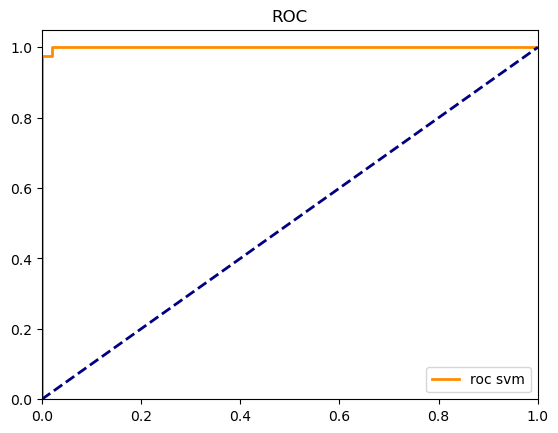

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
y_scores = best_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label = 'roc svm')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Определение сетки параметров для поиска лучших значений
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],  # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],   # Минимальное количество выборок для разделения узла
    'min_samples_leaf': [1, 2, 4]      # Минимальное количество выборок в листовом узле
}

# Поиск лучших параметров с использованием кросс-валидации
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)

# Получение лучшей модели
best_dt_model = grid_search.best_estimator_

Лучшие параметры: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [45]:
# Обучение лучшей модели на обучающем наборе
best_dt_model.fit(X_train, y_train)

# Предсказание меток классов на тестовом наборе
y_pred_dt = best_dt_model.predict(X_test)
y_scores = best_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_pred_dt, y_scores)
roc_auc = roc_auc_score(y_test, y_scores) 
# Оценка метрик качества классификации
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("ROC AUC:", roc_auc)
print("Метрики качества для Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

ROC AUC: 0.999483337638853
Метрики качества для Decision Tree Classifier:
Accuracy: 0.9921875
Precision: 0.9875
Recall: 1.0
F1-score: 0.9937106918238994
Confusion Matrix:
[[48  1]
 [ 0 79]]


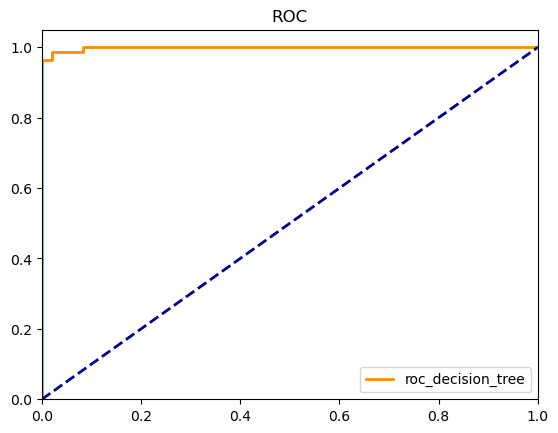

In [46]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label = 'roc_decision_tree')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()